# Python For Analytics - Assignment 3

##### Authors: Aakash Pahuja, Bowen Zhao, Bharadwaj Kacharla, Xiaoqing Li

In [56]:
###Importing packages

import pandas as pd
import seaborn as sns
import matplotlib as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
pd.set_option('display.max_rows', None)
%matplotlib inline


In [3]:
#dataset=pd.read_csv('PERM_FY2020_Q3.csv', encoding='latin1', low_memory = False, parse_dates=['DECISION_DATE', 'RECEIVED_DATE'])
dataset=pd.read_csv('/Users/bharadwajkacharla/Desktop/Desktop - Bharadwaj’s MacBook Pro/Programming for Analytics/Assignments/Assignment-3/PERM_FY2020_Q3.csv')
dataset.head()

/Users/bharadwajkacharla/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (16,19,85,122) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,ORIG_FILE_DATE,PREVIOUS_SWA_CASE_NUMBER_STATE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FOREIGN_WORKER_ALT_OCC_EXP,FOREIGN_WORKER_EXP_WITH_EMPL,FOREIGN_WORKER_EMPL_PAY_FOR_ED,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION,PREPARER_NAME,PREPARER_TITLE,PREPARER_EMAIL,EMP_INFO_DECL_NAME,EMP_INFO_DECL_TITLE
0,A-09245-62715,Denied,9/3/09,4/30/20,N,NaN,NaN,N,SATURN ENTERPRISES INC,2340 N WASHTENAW AVE,...,NaN,N,N,N,N,Christopher E Kurczaba,Attorney,kurczabalaw@sbcglobal.net,Zygmunt Oparowski,President
1,A-10119-96737,Certified-Expired,3/29/10,10/18/19,Y,9/15/00,MARYLAND,N,FIL PARONG,13528 JAMIESON PL,...,NaN,N,N,N,N,WINSTON W TSAI,ATTORNEY AT LAW,WINSTONTSAI@AOL.COM,FIL PARONG,HEAD OF HOUSEHOLD
2,A-10225-13679,Denied,8/10/10,4/30/20,N,NaN,NaN,N,GLENNS PLUMBING SERVICES,854 CUSTER STREET,...,N,N,N,N,N,DANIEL J SULLIVAN,ATTORNEY,GWG8@AOL.COM,DAVID GLENN,OWNER
3,A-11033-51540,Certified,2/3/11,5/28/20,N,NaN,NaN,N,SKILLNET SOLUTIONS INC.,1901 SOUTH BASCOM AVENUE,...,Y,N,N,Y,N,Sonal Kinger,Attorney at Law,sonal.kinger@bakerlawcorp.com,Jack Grover,VP of Finance and Operations
4,A-11074-62984,Denied,3/10/11,6/17/20,N,NaN,NaN,N,"R L CONSTRUCTION, INC.",904 NEPPERHAN AVENUE,...,NaN,N,N,N,N,DENISE S DUTTON,NONATTORNEY,NaN,RITA O SULLIVAN,MANAGER


In [4]:
len(dataset)

71942

In [5]:
dataset.isnull().sum()

CASE_NUMBER                             0
CASE_STATUS                             0
RECEIVED_DATE                           5
DECISION_DATE                           0
REFILE                                  0
ORIG_FILE_DATE                      71866
PREVIOUS_SWA_CASE_NUMBER_STATE      71863
SCHD_A_SHEEPHERDER                      3
EMPLOYER_NAME                           0
EMPLOYER_ADDRESS_1                      2
EMPLOYER_ADDRESS_2                  47954
EMPLOYER_CITY                           0
EMPLOYER_STATE_PROVINCE                 1
EMPLOYER_COUNTRY                       17
EMPLOYER_POSTAL_CODE                    3
EMPLOYER_PHONE                          0
EMPLOYER_PHONE_EXT                  65879
EMPLOYER_NUM_EMPLOYEES                  9
EMPLOYER_YEAR_COMMENCED_BUSINESS       27
NAICS_CODE                             49
FW_OWNERSHIP_INTEREST                   2
EMP_CONTACT_NAME                        0
EMP_CONTACT_ADDRESS_1                   3
EMP_CONTACT_ADDRESS_2             

In [6]:
#Making a copy of the dataset
dataset_copy = dataset

In [7]:
# Filtering for the columns that are relevant for the analysis

dataset_copy=dataset[['CASE_STATUS',
'REFILE',
'RECEIVED_DATE',
'DECISION_DATE',
'SCHD_A_SHEEPHERDER',
'EMPLOYER_NAME',
'EMPLOYER_CITY',
'EMPLOYER_STATE_PROVINCE',
'EMPLOYER_POSTAL_CODE',
'EMPLOYER_PHONE_EXT',
'EMPLOYER_NUM_EMPLOYEES',
'EMPLOYER_YEAR_COMMENCED_BUSINESS',
'NAICS_CODE',
'FW_OWNERSHIP_INTEREST',
'EMP_CONTACT_CITY',
'EMP_CONTACT_STATE_PROVINCE',
'EMP_CONTACT_COUNTRY',
'EMP_CONTACT_POSTAL_CODE',
'AGENT_ATTORNEY_NAME',
'AGENT_ATTORNEY_FIRM_NAME',
'PW_SOC_TITLE',
'PW_SOC_CODE',
'PW_SKILL_LEVEL',
'PW_WAGE',
'PW_UNIT_OF_PAY',
'JOB_TITLE',
'MINIMUM_EDUCATION',
'JOB_EDUCATION_MIN_OTHER',
'MAJOR_FIELD_OF_STUDY',
'REQUIRED_TRAINING',
'REQUIRED_TRAINING_MONTHS',
'REQUIRED_FIELD_OF_TRAINING',
'REQUIRED_EXPERIENCE',
'REQUIRED_EXPERIENCE_MONTHS',
'ACCEPT_ALT_FIELD_OF_STUDY',
'ACCEPT_ALT_MAJOR_FLD_OF_STUDY',
'ACCEPT_ALT_COMBO',
'ACCEPT_ALT_COMBO_EDUCATION',
'ACCEPT_ALT_COMBO_ED_OTHER',
'ACCEPT_ALT_COMBO_EDUCATION_YRS',
'ACCEPT_FOREIGN_EDUCATION',
'ACCEPT_ALT_OCCUPATION',
'ACCEPT_ALT_OCCUPATION_MONTHS',
'ACCEPT_ALT_JOB_TITLE',
'JOB_OPP_REQUIREMENTS_NORMAL',
'FOREIGN_LANGUAGE_REQUIRED',
'SPECIFIC_SKILLS',
'COMBINATION_OCCUPATION',
'OFFERED_TO_APPL_FOREIGN_WORKER',
'FOREIGN_WORKER_LIVE_ON_PREM',
'FOREIGN_WORKER_LIVE_IN_DOM_SER',
'FOREIGN_WORKER_LIVE_IN_DOM_CNT',
'PROFESSIONAL_OCCUPATION',
'APP_FOR_COLLEGE_U_TEACHER',
'COMPETITIVE_PROCESS',
'BASIC_RECRUITMENT_PROCESS',
'FIRST_NEWSPAPER_NAME',
'SECOND_NEWSPAPER_AD_NAME',
'COUNTRY_OF_CITIZENSHIP',
'CLASS_OF_ADMISSION',
'FOREIGN_WORKER_EDUCATION',
'FOREIGN_WORKER_INFO_MAJOR']]

In [8]:
dataset_copy.head()

,CASE_STATUS,REFILE,RECEIVED_DATE,DECISION_DATE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE_PROVINCE,EMPLOYER_POSTAL_CODE,EMPLOYER_PHONE_EXT,...,PROFESSIONAL_OCCUPATION,APP_FOR_COLLEGE_U_TEACHER,COMPETITIVE_PROCESS,BASIC_RECRUITMENT_PROCESS,FIRST_NEWSPAPER_NAME,SECOND_NEWSPAPER_AD_NAME,COUNTRY_OF_CITIZENSHIP,CLASS_OF_ADMISSION,FOREIGN_WORKER_EDUCATION,FOREIGN_WORKER_INFO_MAJOR
0,Denied,N,9/3/09,4/30/20,N,SATURN ENTERPRISES INC,CHICAGO,ILLINOIS,60647,NaN,...,N,N,NaN,NaN,Chicago Tribune,Chicago Tribune,POLAND,B-2,High School,GENERAL
1,Certified-Expired,Y,3/29/10,10/18/19,N,FIL PARONG,GERMANTOWN,MARYLAND,20874,NaN,...,N,N,N,N,WASHINGTON EXAMINER,WASHINGTON EXAMINER,PHILIPPINES,B-2,High School,HIGH SCHOOL
2,Denied,N,8/10/10,4/30/20,N,GLENNS PLUMBING SERVICES,N. VALLEY STREAM,NEW YORK,11580,NaN,...,N,N,N,N,NY Post,NY Post,EL SALVADOR,EWI,None,NaN
3,Certified,N,2/3/11,5/28/20,N,SKILLNET SOLUTIONS INC.,CAMPBELL,CALIFORNIA,95008,NaN,...,Y,N,NaN,NaN,San Jose Mercury News,San Jose Mercury News,INDIA,H-1B,Other,ELECTRONICS ENGINEERING COMPUTER SCIENCE
4,Denied,N,3/10/11,6/17/20,N,"R L CONSTRUCTION, INC.",YONKERS,NEW YORK,10703,NaN,...,N,N,NaN,NaN,NEW YORK POST,NEW YORK POST,IRELAND,NaN,High School,GENERAL


In [9]:
dataset_copy.dtypes

CASE_STATUS                          object
REFILE                               object
RECEIVED_DATE                        object
DECISION_DATE                        object
SCHD_A_SHEEPHERDER                   object
EMPLOYER_NAME                        object
EMPLOYER_CITY                        object
EMPLOYER_STATE_PROVINCE              object
EMPLOYER_POSTAL_CODE                 object
EMPLOYER_PHONE_EXT                   object
EMPLOYER_NUM_EMPLOYEES              float64
EMPLOYER_YEAR_COMMENCED_BUSINESS    float64
NAICS_CODE                           object
FW_OWNERSHIP_INTEREST                object
EMP_CONTACT_CITY                     object
EMP_CONTACT_STATE_PROVINCE           object
EMP_CONTACT_COUNTRY                  object
EMP_CONTACT_POSTAL_CODE              object
AGENT_ATTORNEY_NAME                  object
AGENT_ATTORNEY_FIRM_NAME             object
PW_SOC_TITLE                         object
PW_SOC_CODE                          object
PW_SKILL_LEVEL                  

In [10]:
dataset_copy.isnull().sum()

CASE_STATUS                             0
REFILE                                  0
RECEIVED_DATE                           5
DECISION_DATE                           0
SCHD_A_SHEEPHERDER                      3
EMPLOYER_NAME                           0
EMPLOYER_CITY                           0
EMPLOYER_STATE_PROVINCE                 1
EMPLOYER_POSTAL_CODE                    3
EMPLOYER_PHONE_EXT                  65879
EMPLOYER_NUM_EMPLOYEES                  9
EMPLOYER_YEAR_COMMENCED_BUSINESS       27
NAICS_CODE                             49
FW_OWNERSHIP_INTEREST                   2
EMP_CONTACT_CITY                        1
EMP_CONTACT_STATE_PROVINCE              3
EMP_CONTACT_COUNTRY                    11
EMP_CONTACT_POSTAL_CODE                 4
AGENT_ATTORNEY_NAME                     0
AGENT_ATTORNEY_FIRM_NAME             5956
PW_SOC_TITLE                            9
PW_SOC_CODE                            46
PW_SKILL_LEVEL                       4303
PW_WAGE                           

In [11]:
#Based on the above missing value info, we've decided to remove additional columns

dataset_copy = dataset_copy.drop(['EMPLOYER_PHONE_EXT','FOREIGN_WORKER_LIVE_IN_DOM_CNT'],axis=1)

In [12]:
#The features need to be checked for the unique values to understand the variation of data across different applicants
dataset_copy.nunique()

CASE_STATUS                             4
REFILE                                  2
RECEIVED_DATE                         852
DECISION_DATE                         236
SCHD_A_SHEEPHERDER                      1
EMPLOYER_NAME                       19918
EMPLOYER_CITY                        4434
EMPLOYER_STATE_PROVINCE               588
EMPLOYER_POSTAL_CODE                 6062
EMPLOYER_NUM_EMPLOYEES               2905
EMPLOYER_YEAR_COMMENCED_BUSINESS      240
NAICS_CODE                           2644
FW_OWNERSHIP_INTEREST                   2
EMP_CONTACT_CITY                     4249
EMP_CONTACT_STATE_PROVINCE            781
EMP_CONTACT_COUNTRY                     5
EMP_CONTACT_POSTAL_CODE              6034
AGENT_ATTORNEY_NAME                  6246
AGENT_ATTORNEY_FIRM_NAME             4928
PW_SOC_TITLE                         5202
PW_SOC_CODE                           633
PW_SKILL_LEVEL                          4
PW_WAGE                              9211
PW_UNIT_OF_PAY                    

### Data Cleaning

In [13]:
#Convering the date to just the year
dataset_copy['RECEIVED_DATE'] = pd.to_datetime(dataset_copy['RECEIVED_DATE'], errors='coerce')
dataset_copy['RECEIVED_YEAR'] = pd.to_datetime(dataset_copy['RECEIVED_DATE'], errors='coerce')
dataset_copy['RECEIVED_YEAR'] = dataset_copy['RECEIVED_YEAR'].dt.year

#Extracting year from decision date and converting to an integer value
dataset_copy['DECISION_DATE'] = pd.to_datetime(dataset_copy['DECISION_DATE'], errors='coerce')
dataset_copy['DECISION_YEAR'] = dataset_copy['DECISION_DATE'].dt.year

CATEGORIZING LARGE INCOME OR WAGE VALUES

In [14]:
dataset_copy['PW_UNIT_OF_PAY'].unique()

array(['Hour', 'Year', 'Bi-Weekly', nan, 'Month', 'Week'], dtype=object)

In [15]:
dataset_copy['PW_WAGE'] = dataset_copy['PW_WAGE'].str.replace(",",'')
dataset_copy['PW_WAGE'].head()

0        $14.49
1        $19.36
2     $78645.00
3    $131518.00
4     $53643.00
Name: PW_WAGE, dtype: object

In [16]:
#Replacing commas and dollar signs with whitespace character to convert the data type from object to float
dataset_copy['PW_WAGE'] = dataset_copy['PW_WAGE'].str.replace('$','')
dataset_copy['PW_WAGE'] = dataset_copy['PW_WAGE'].str.replace(",",'')
dataset_copy['PW_WAGE'] = dataset_copy['PW_WAGE'].astype('float')

#to convet from "Hour" to "Year", we multiply the hourly wage with 250 and 8. 250 is the average number of working days in a year while 8 is the number of hours worked in day.
#to convet from "Week" to "Year", we multiply thw weekly wage with 50. 50 is the number of working weeks in a year
#to convet from "Month" to "Year", we multiply thw monthly wage with 12. 12 is the number of working months in a year
#to convet from "Bi-Weekly" to "Year", we multiply thw bi-weekly wage with 25. 25 is the number of working bi-weeks in a year

for unit in dataset_copy.PW_UNIT_OF_PAY.unique():
    if unit == "Hour":
        dataset_copy.loc[dataset_copy['PW_UNIT_OF_PAY'] == unit, 'PW_WAGE'] = dataset_copy['PW_WAGE'].apply(lambda x: float(x) * 8 * 250)
        dataset_copy.loc[dataset_copy['PW_UNIT_OF_PAY'] == unit, 'PW_UNIT_OF_PAY'] = dataset_copy['PW_UNIT_OF_PAY'].replace(to_replace = unit, value = "Year") 
    elif unit == "Week":
        dataset_copy.loc[dataset_copy['PW_UNIT_OF_PAY'] == unit, 'PW_WAGE'] = dataset_copy['PW_WAGE'].apply(lambda x: float(x) * 50)
        dataset_copy.loc[dataset_copy['PW_UNIT_OF_PAY'] == unit, 'PW_UNIT_OF_PAY'] = dataset_copy['PW_UNIT_OF_PAY'].replace(to_replace = unit, value = "Year")
    elif unit == "Month":
        dataset_copy.loc[dataset_copy['PW_UNIT_OF_PAY'] == unit, 'PW_WAGE'] = dataset_copy['PW_WAGE'].apply(lambda x: float(x) * 12)
        dataset_copy.loc[dataset_copy['PW_UNIT_OF_PAY'] == unit, 'PW_UNIT_OF_PAY'] = dataset_copy['PW_UNIT_OF_PAY'].replace(to_replace = unit, value = "Year")
    elif unit == "Bi-Weekly":  
        dataset_copy.loc[dataset_copy['PW_UNIT_OF_PAY'] == unit, 'PW_WAGE'] = dataset_copy['PW_WAGE'].apply(lambda x: float(x) * 25)
        dataset_copy.loc[dataset_copy['PW_UNIT_OF_PAY'] == unit, 'PW_UNIT_OF_PAY'] = dataset_copy['PW_UNIT_OF_PAY'].replace(to_replace = unit, value = "Year")
    else:
        continue
        
#Filling missing values with median 
dataset_copy['PW_WAGE']= dataset_copy['PW_WAGE'].fillna((dataset_copy['PW_WAGE'].median()))

#Changing format from string to float
dataset_copy['PW_WAGE'] = dataset_copy.PW_WAGE.astype(float)

#Displaying 10 first values
dataset_copy[['PW_WAGE','PW_UNIT_OF_PAY']].head(10)

,PW_WAGE,PW_UNIT_OF_PAY
0,28980.0,Year
1,38720.0,Year
2,78645.0,Year
3,131518.0,Year
4,53643.0,Year
5,49691.0,Year
6,92830.0,Year
7,74630.0,Year
8,34237.0,Year
9,42530.0,Year


In [17]:
dataset_copy['PW_WAGE'].describe()

count    7.194200e+04
mean     8.948164e+04
std      6.253989e+04
min      1.114000e+01
25%      6.419425e+04
50%      9.245600e+04
75%      1.137970e+05
max      1.338060e+07
Name: PW_WAGE, dtype: float64

In [18]:
#Dividing our continuous income values into some categories to facilitate their visualization
dataset_copy['REMUNERATION'] = pd.cut(dataset_copy['PW_WAGE'], [0, 30000, 60000,90000,120000,150000,180000,210000,240000,270000,495748000], right=False, labels=["0-30k", "30-60k","60-90k","90-120k","120-150k","150-180k","180-210k","210-240k","240-270k","270k+"])
salary = dataset_copy['REMUNERATION'].value_counts()
salary.iloc[np.argsort(salary.index)]

0-30k        6214
30-60k       9898
60-90k      18035
90-120k     24536
120-150k     9938
150-180k     2340
180-210k      734
210-240k      181
240-270k       59
270k+           7
Name: REMUNERATION, dtype: int64

DIFFERENT LETTER CASING

In [19]:
dataset_copy['JOB_TITLE'].value_counts()[:30]

Software Engineer                   5510
Software Development Engineer II    1586
Senior Software Engineer            1238
Software Developer                  1090
Assistant Professor                  720
Technical Lead                       596
Computer Systems Analyst B           469
TRUCK DRIVER                         448
Software Development Engineer        413
Manager                              400
Landscape Laborer                    363
SOFTWARE DEVELOPER                   328
Senior Software Developer            310
Programmer Analyst                   307
Data Scientist                       300
Component Design Engineer            291
Sr. Software Engineer                285
Software Engineer II                 270
Process Engineer                     260
Systems Analyst                      260
Technical Architect                  256
Truck Driver                         251
JANITOR                              242
Software Engineer 3                  220
Caregiver       

In [20]:
dataset_copy['JOB_TITLE'] = dataset_copy['JOB_TITLE'].str.lower()

#Splitting job titles by '-'
dataset_copy['JOB_TITLE'] = dataset_copy['JOB_TITLE'].astype(str).str.split('-').str[0]
#Splitting job titles by 'ii'
dataset_copy['JOB_TITLE'] = dataset_copy['JOB_TITLE'].astype(str).str.split('ii').str[0]
#Splitting job titles by '/'
dataset_copy['JOB_TITLE'] = dataset_copy['JOB_TITLE'].astype(str).str.split('/').str[0]
#Removing leading and ending spaces
dataset_copy['JOB_TITLE'] = dataset_copy['JOB_TITLE'].astype(str).str.strip()
#Replacing "sr." values with "senior"
dataset_copy['JOB_TITLE'] = dataset_copy['JOB_TITLE'].str.replace('sr.', 'senior')
#Replacing "NaN", "NaT" and "nan" values with np.nan
dataset_copy['JOB_TITLE'].replace(["NaN", 'NaT','nan'], np.nan, inplace = True)


dataset_copy['JOB_TITLE'].value_counts(dropna=True)[:60]

software engineer                      6140
software development engineer          2115
software developer                     1738
senior software engineer               1720
assistant professor                     803
truck driver                            699
technical lead                          608
senior software developer               512
computer systems analyst b              469
manager                                 447
programmer analyst                      427
landscape laborer                       365
janitor                                 353
data scientist                          345
systems analyst                         318
caregiver                               303
component design engineer               291
process engineer                        270
technical architect                     259
accountant                              232
lead software engineer                  223
software engineer 3                     222
project manager                 

##### Distribution of the employers, employees and the attorney representation of the employees

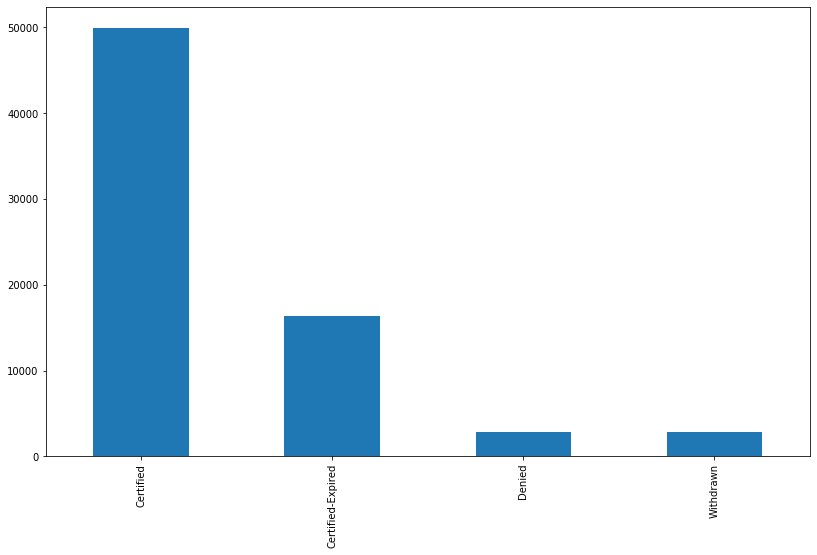

In [21]:
#Total Number of data points of each class
dataset_copy['CASE_STATUS'].value_counts().plot.bar(figsize = (13.7, 8.27))

Since Certified and Certified-Expired are the same we are replacing Certified-Expired with Certified

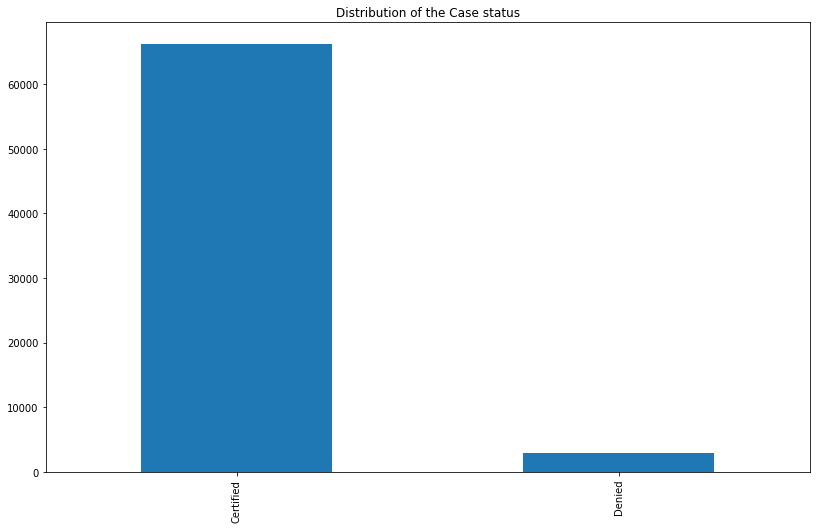

In [22]:
dataset_copy.loc[dataset_copy.CASE_STATUS == 'Certified-Expired', 'CASE_STATUS'] = 'Certified'

dataset_copy = dataset_copy[dataset_copy.CASE_STATUS != 'Withdrawn']

plt.pyplot.title('Distribution of the Case status')
dataset_copy['CASE_STATUS'].value_counts().plot.bar(figsize = (13.7, 8.27))

Majority of the applications have been approved for Permanent Labour Employment Certification

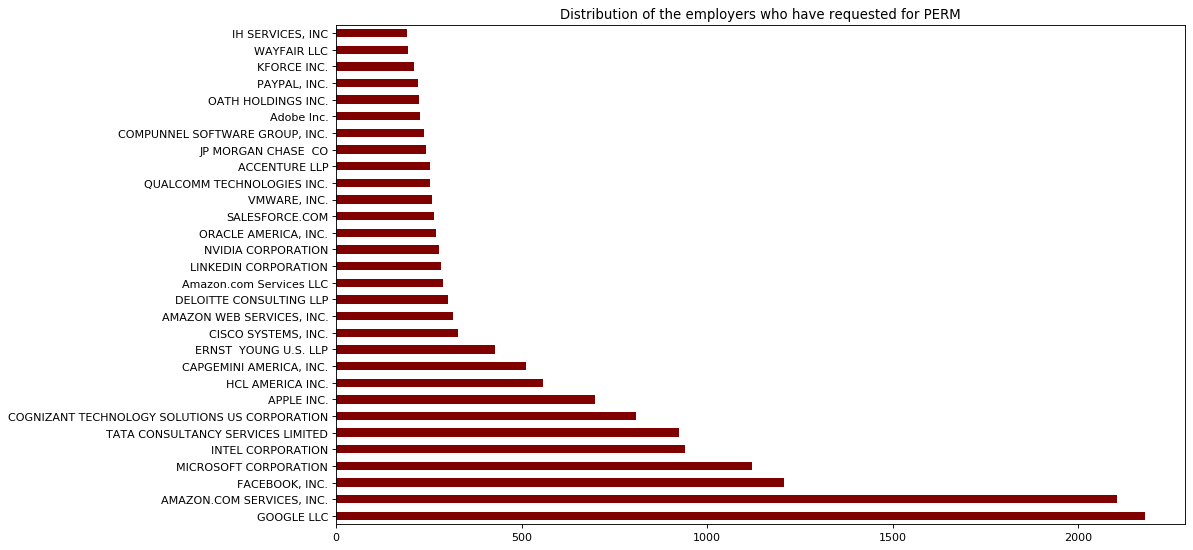

In [23]:
figure(num=None, figsize=(13.7, 8.27), dpi=80, facecolor='w', edgecolor='k')
plt.pyplot.title('Distribution of the employers who have requested for PERM')
dataset_copy['EMPLOYER_NAME'].value_counts().head(30).plot(kind = 'barh',color = 'maroon')

As we can see, 9 out of 10 most beneficial companies for Visa applicants are IT industry representatives. This leads to the assumption that IT sector is both most favourable and demanding one in United States.

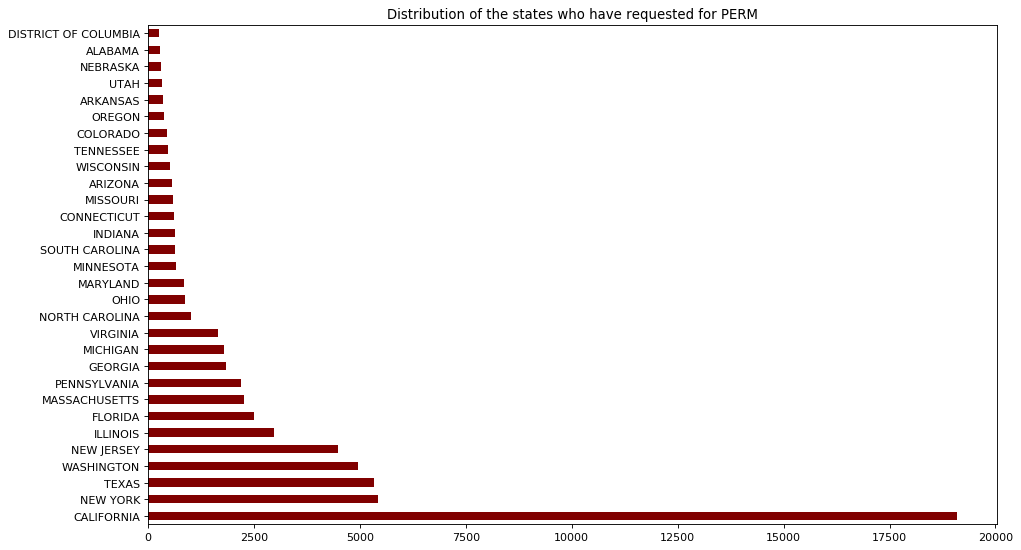

In [24]:
figure(num=None, figsize=(13.7, 8.27), dpi=80, facecolor='w', edgecolor='k')
plt.pyplot.title('Distribution of the states who have requested for PERM')
dataset_copy['EMPLOYER_STATE_PROVINCE'].value_counts().head(30).plot(kind = 'barh',color = 'maroon')

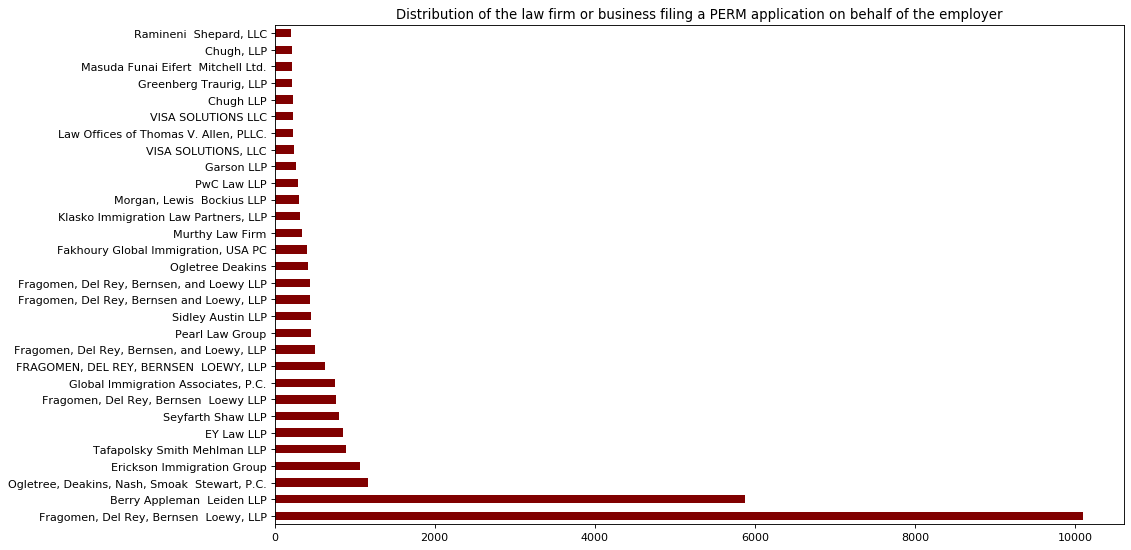

In [25]:
figure(num=None, figsize=(13.7, 8.27), dpi=80, facecolor='w', edgecolor='k')
plt.pyplot.title('Distribution of the law firm or business filing a PERM application on behalf of the employer')
dataset_copy['AGENT_ATTORNEY_FIRM_NAME'].value_counts().head(30).plot(kind = 'barh',color = 'maroon')

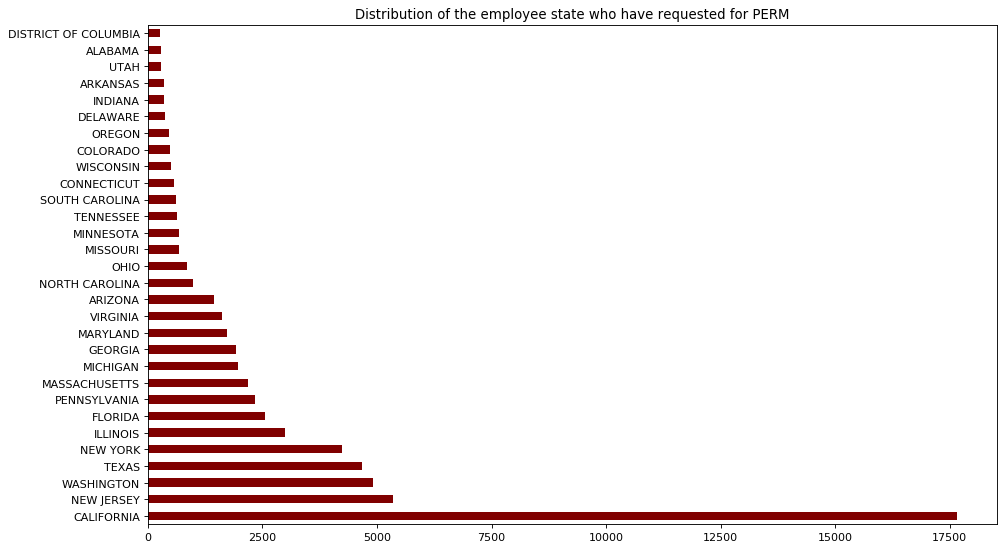

In [26]:
figure(num=None, figsize=(13.7, 8.27), dpi=80, facecolor='w', edgecolor='k')
plt.pyplot.title('Distribution of the employee state who have requested for PERM')
dataset_copy['EMP_CONTACT_STATE_PROVINCE'].value_counts().head(30).plot(kind = 'barh',color = 'maroon')

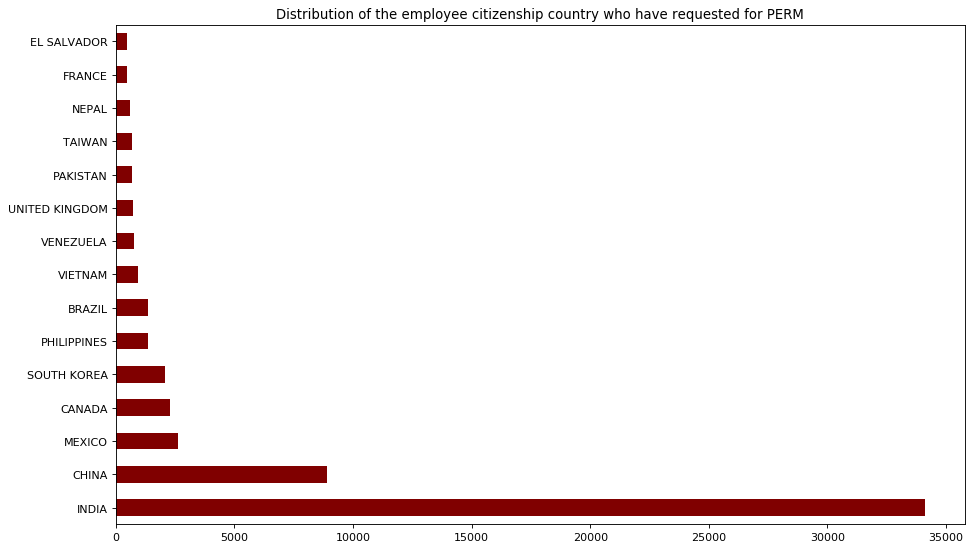

In [27]:
figure(num=None, figsize=(13.7, 8.27), dpi=80, facecolor='w', edgecolor='k')
plt.pyplot.title('Distribution of the employee citizenship country who have requested for PERM')
dataset_copy['COUNTRY_OF_CITIZENSHIP'].value_counts().head(15).plot(kind = 'barh',color = 'maroon')

The majority of Visa applications has been submitted by Indian citizens. They constitute to more than half of our observations.

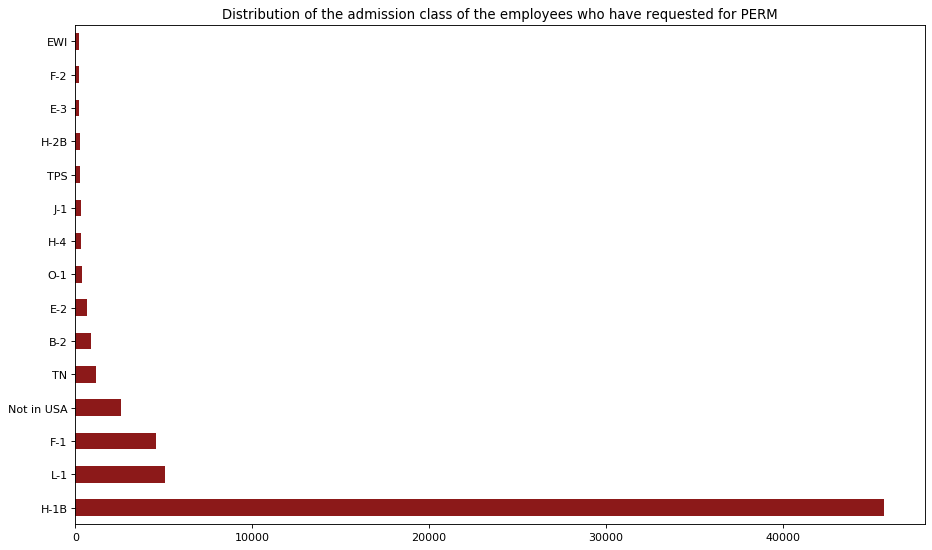

In [28]:
#the top 15 visas types frequency
figure(num=None, figsize=(13.7, 8.27), dpi=80, facecolor='w', edgecolor='k')
plt.pyplot.title('Distribution of the admission class of the employees who have requested for PERM')
dataset_copy['CLASS_OF_ADMISSION'].value_counts().head(15).plot(kind='barh',alpha = 0.9, color ='maroon')

The vast majority of petitioners were applying for the H-1B Visa, which according to the Wikipedia, allows U.S. employers to employ foreign workers in specialty occupations. If a foreign worker in H-1B status quits or is dismissed from the sponsoring employer, the worker must either apply for and be granted a change of status, find another employer (subject to application for adjustment of status and/or change of visa), or leave the United States.

[Text(0, 0.5, 'Number of Visa applications'), Text(0.5, 0, 'Job Title')]

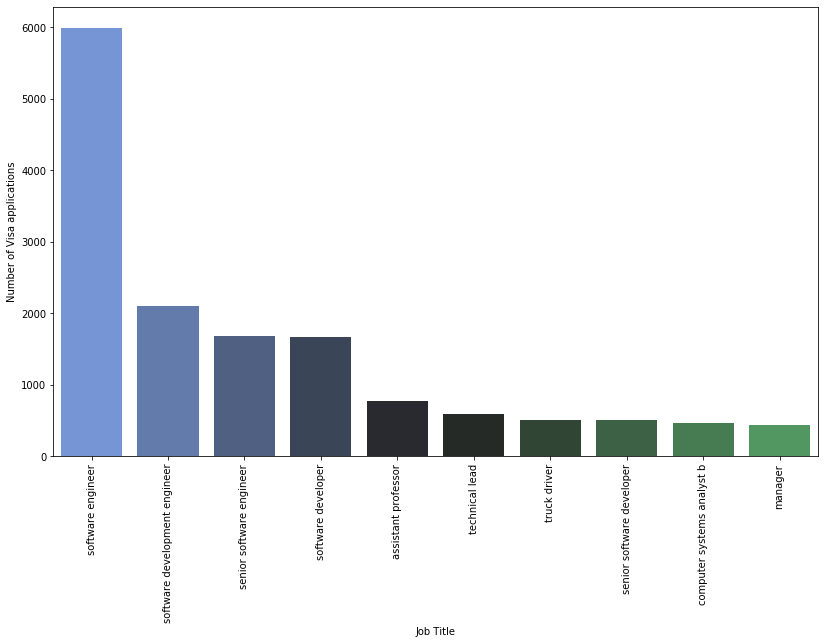

In [29]:
fig, ax = plt.pyplot.subplots()
fig.set_size_inches(13.7, 8.27)
sns.countplot(x='JOB_TITLE',data=dataset_copy, 
               palette = sns.diverging_palette(255, 133, l=60, n=10, center="dark"), 
               order=dataset_copy.JOB_TITLE.value_counts().iloc[:10].index)   
plt.pyplot.xticks(rotation=90)
ax.set(xlabel='Job Title', ylabel='Number of Visa applications')

Interestingely, all of the most popular positions except "assistant professor", "truck driver" and "manager" are derived from the IT industry. This is another confirmation that there is a huge demand for IT specialists in USA.

[Text(0, 0.5, 'Number of Visa applications'), Text(0.5, 0, 'Education level')]

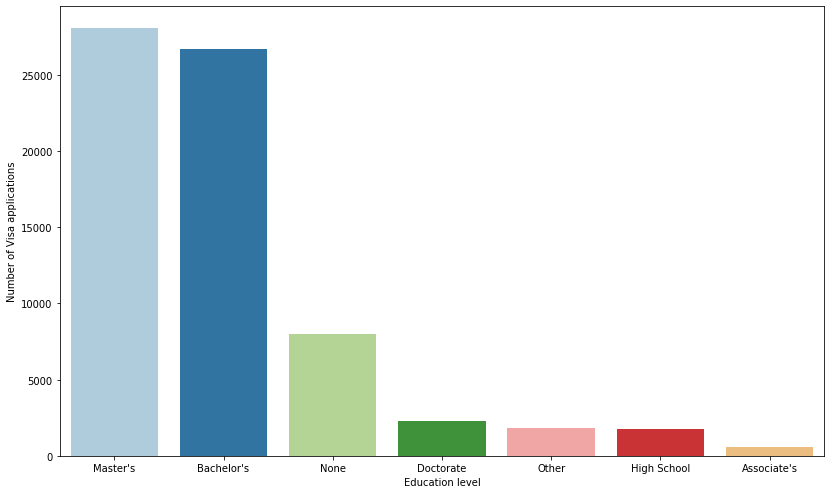

In [30]:
fig, ax = plt.pyplot.subplots()
fig.set_size_inches(13.7, 8.27)

sns.countplot(x='MINIMUM_EDUCATION',data=dataset_copy, 
               palette = sns.color_palette("Paired"), 
               order=dataset_copy.MINIMUM_EDUCATION.value_counts().iloc[:10].index)
 
ax.set(xlabel='Education level', ylabel='Number of Visa applications')

As we can see, over 50% of applicants obtained a university degree. 

/Users/bharadwajkacharla/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/bharadwajkacharla/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


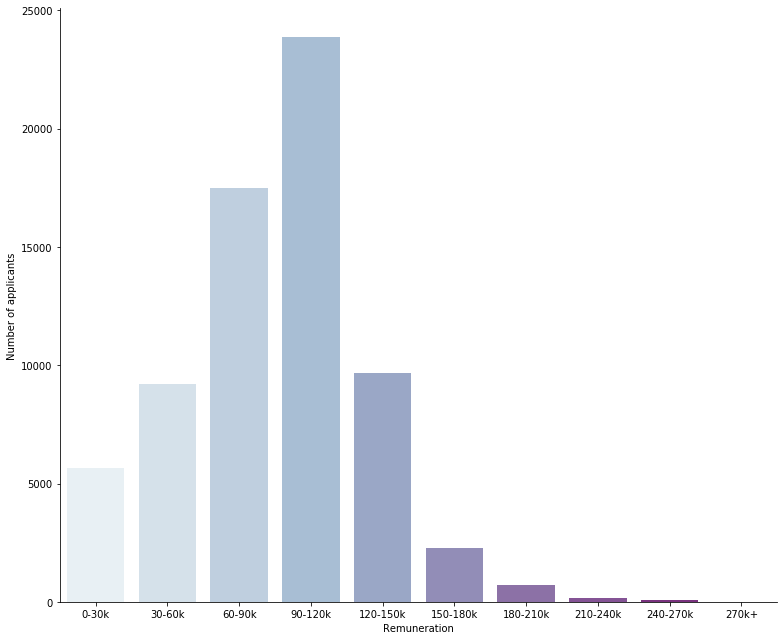

In [31]:
fig.set_size_inches(13.7, 8.27)
g = sns.factorplot(x='REMUNERATION', data=dataset_copy, kind="count",
                   palette="BuPu", size=9, aspect=1.2)

g.set(xlabel='Remuneration', ylabel='Number of applicants')

As we can see, over 65% of the applicants earn between 60 and 120 thousand dollars yearly.


According to the analysis we have done, the chosen variables that are significant for predicting Visa application decisions are: class of admission(Visa type), country of citizenship and employer related details like location, name and state.

In [32]:
#Calculating the "Decision Time" taken between the visa application being received and the decision given out.
dataset_copy['DECISION_TIME'] = dataset_copy['DECISION_DATE']-dataset_copy['RECEIVED_DATE']
dataset_copy['DECISION_TIME'] = pd.to_numeric(dataset_copy['DECISION_TIME'].dt.days, downcast='integer') 

In [33]:
#Calculating the mean "Decision Time" taken for a PERM application based on a JOB TITLE. 
dataset_avgdec_time = pd.DataFrame(dataset_copy.groupby(['JOB_TITLE'],as_index=False)['DECISION_TIME'].mean())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

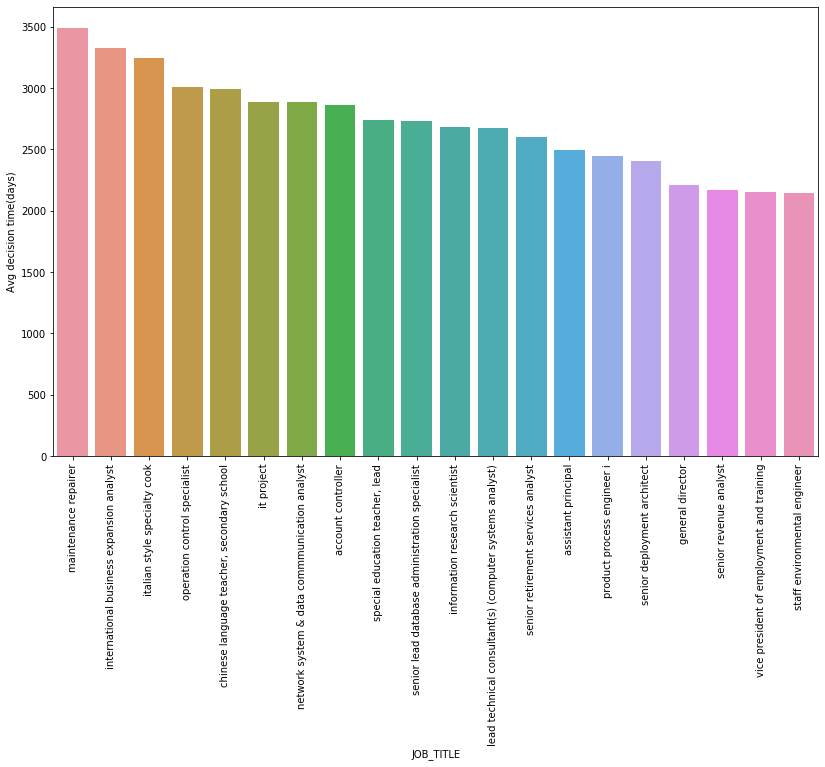

In [34]:
fig, ax = plt.pyplot.subplots()
fig.set_size_inches(13.7, 8.27)
sns.set_context(rc={"font.size":12})
sns.barplot(x="JOB_TITLE",y="DECISION_TIME",data=dataset_avgdec_time.sort_values(by=['DECISION_TIME'],ascending=False).iloc[:20])
ax.set(xlabel='JOB_TITLE', ylabel='Avg decision time(days)')
plt.pyplot.xticks(rotation=90)

The roles related to IT industry have high wait times when compared to other roles.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

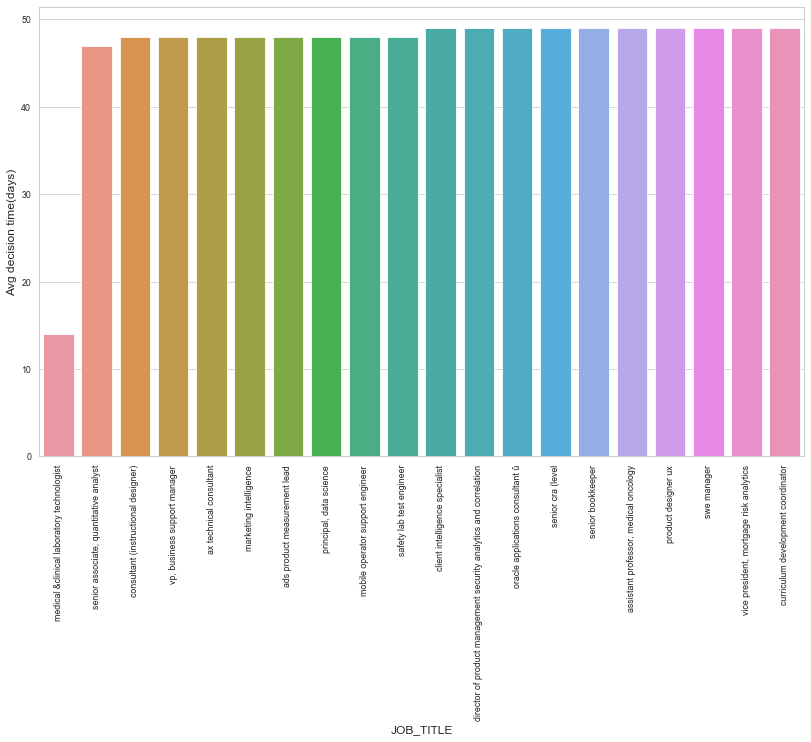

In [54]:
fig, ax = plt.pyplot.subplots()
fig.set_size_inches(13.7, 8.27)
sns.set_context(rc={"font.size":12})
sns.barplot(x="JOB_TITLE",y="DECISION_TIME",data=dataset_avgdec_time.sort_values(by=['DECISION_TIME'],ascending=True).iloc[:20])
ax.set(xlabel='JOB_TITLE', ylabel='Avg decision time(days)')
plt.pyplot.xticks(rotation=90)

On the other hand, the CXO roles have very less wait time. The application gets accepted in a period of 1.5 - 2 months.

In [36]:
# find out which cases are more likely to succeed. 
# 1. Overall percentages/distribution of the 'CASE_STATUS' Column
dataset_copy['CASE_STATUS'].value_counts(normalize=True)

Certified    0.958303
Denied       0.041697
Name: CASE_STATUS, dtype: float64

In [37]:
# Grouping the data based on the applicants occuptation 
# Check if certain occupations are more like to be succeed. 
dataset_copy['JOB_TITLE'] = dataset['JOB_TITLE'].str.lower()
job_grp = dataset_copy.groupby(['JOB_TITLE'])

In [38]:
# For example: 
# As we can see below the 'software developer' have higher certified rate than the overall certified rate
job_grp['CASE_STATUS'].value_counts(normalize=True).loc['software developer']

CASE_STATUS
Certified    0.972161
Denied       0.027839
Name: CASE_STATUS, dtype: float64

In [39]:
# Let's check which country's citizen has higher chance to be successd
country_grp = dataset_copy.groupby(['COUNTRY_OF_CITIZENSHIP'])
country_grp['CASE_STATUS'].value_counts(normalize=True).head()

COUNTRY_OF_CITIZENSHIP  CASE_STATUS
AFGHANISTAN             Certified      0.818182
                        Denied         0.181818
ALBANIA                 Certified      0.890000
                        Denied         0.110000
ALGERIA                 Certified      0.833333
Name: CASE_STATUS, dtype: float64

In [40]:
# As we can see below Chinese citizen have a higher success rate than the overall average
country_grp['CASE_STATUS'].value_counts(normalize=True).loc['CHINA']

CASE_STATUS
Certified    0.976551
Denied       0.023449
Name: CASE_STATUS, dtype: float64

In [41]:
# Create new dataframe to analyze the success rate with citizenship
# The results dataframe indicate which country's citizenship are more likly to be denied
rows = []
for c in dataset_copy['COUNTRY_OF_CITIZENSHIP'].unique():
    try: 
        denied_rate = country_grp['CASE_STATUS'].value_counts(normalize=True).loc[c]['Denied']
    except KeyError as err:
        denied_rate = 0
    rows.append([c, denied_rate])

country_df = pd.DataFrame(rows, columns=['COUNTRY', 'DENIED_RATE'])
country_df.set_index(['COUNTRY'], inplace = True)
country_df.sort_values(by='DENIED_RATE', ascending=False)
#Its looks like people from CUBA will not be accepted

,DENIED_RATE
COUNTRY,
CUBA,1.000000
BHUTAN,0.666667
GAMBIA,0.500000
BURKINA FASO,0.500000
COSTA RICA,0.373737
UNITED STATES OF AMERICA,0.371429
BELIZE,0.333333
SIERRA LEONE,0.333333
COTE d'IVOIRE,0.285714


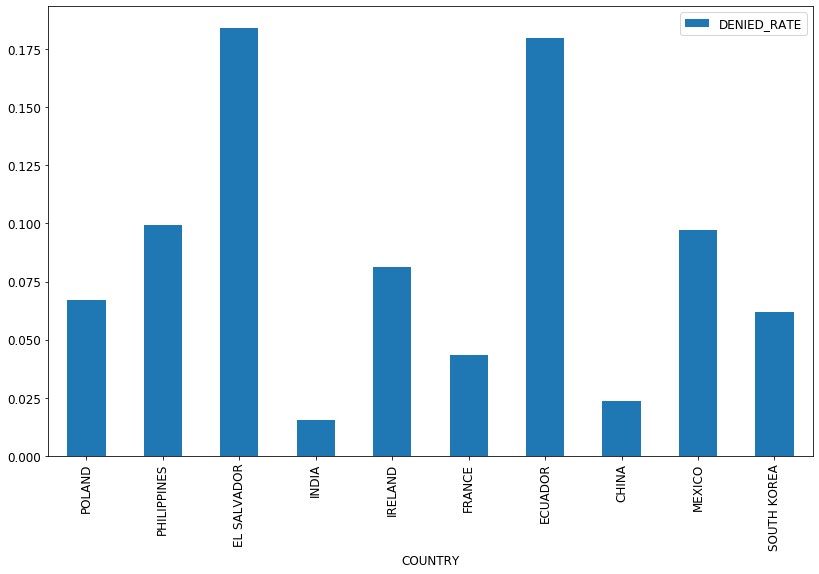

In [42]:
#Graph indicates which country's citizenship are more likly to be denied
country_df.iloc[:10].plot.bar(figsize=(13.7, 8.27))

##### Now that we have looked at the distribution of applications across the features, we'll deep dive into these features on the basis of the case status

[Text(0, 0.5, 'Number of Visa applicatons'),
 Text(0.5, 0, 'Visa application year')]

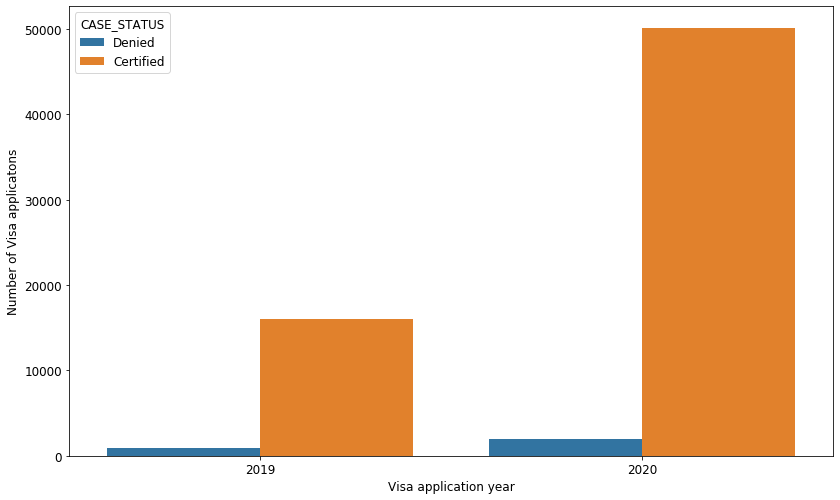

In [43]:
fig, ax = plt.pyplot.subplots()
fig.set_size_inches(13.7, 8.27)
sns.set_context(rc={"font.size":12})
sns.countplot(x="DECISION_YEAR", hue="CASE_STATUS", data=dataset_copy)
ax.set(xlabel='Visa application year', ylabel='Number of Visa applicatons')

As we can observe, the number of submitted Visa applications were more in 2019 than in 2020. It's interesting to see that while the number of positively for considered applications increases for both the certified and denied applicants.

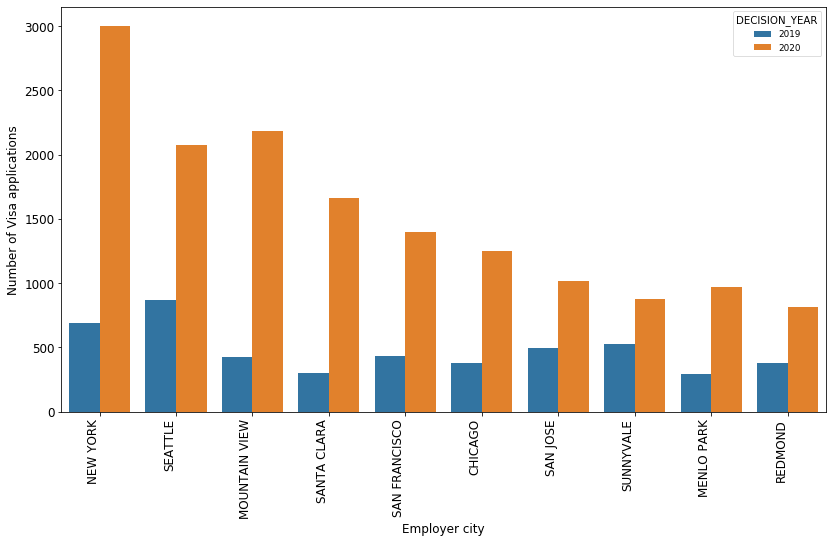

In [44]:
fig, ax = plt.pyplot.subplots()
fig.set_size_inches(13.7, 8.27)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
sns.countplot(x='EMPLOYER_CITY', hue='DECISION_YEAR', data=dataset_copy, order=dataset_copy.EMPLOYER_CITY.value_counts().iloc[:10].index)
ax.set(xlabel='Employer city', ylabel='Number of Visa applications')

fig.autofmt_xdate(rotation=90)


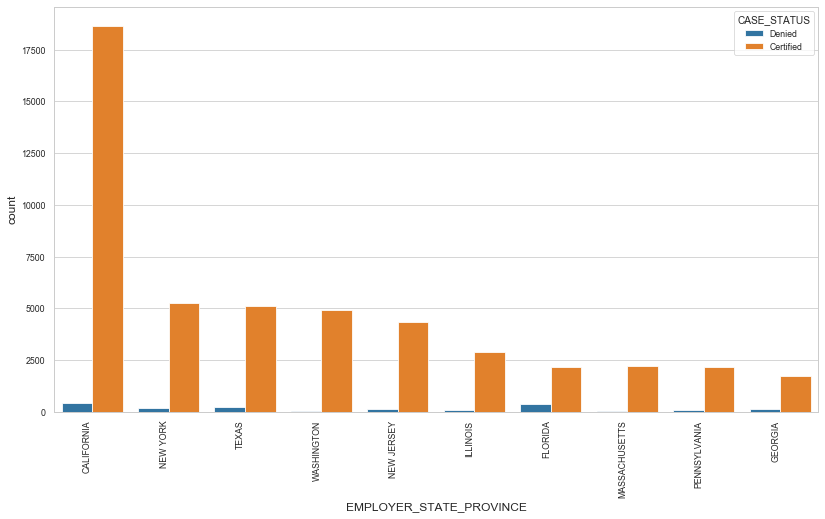

In [45]:
#Graph showing the proportion of Certified and Denied PERM applications for the top 10 states by number of applicants

sns.set_style("whitegrid")
fig, ax = plt.pyplot.subplots()
fig.set_size_inches(13.7, 8.27)
sns.countplot(ax = ax, x='EMPLOYER_STATE_PROVINCE', data = dataset_copy, hue='CASE_STATUS', \
              order=dataset_copy.EMPLOYER_STATE_PROVINCE.value_counts().iloc[:10].index,alpha = 1)


fig.autofmt_xdate(rotation=90)

The top 10 cities in which the employers offer visa to foreign workers

In 2019 and 2020, the most popular destination cities were: New York, Seattle, Mountain View, Santa Clara, San Francisco, Chicago, San Jose, Sunnyvale, Menlo Park and Redmond. In most of the cities there was a positive trend in Visa applications.

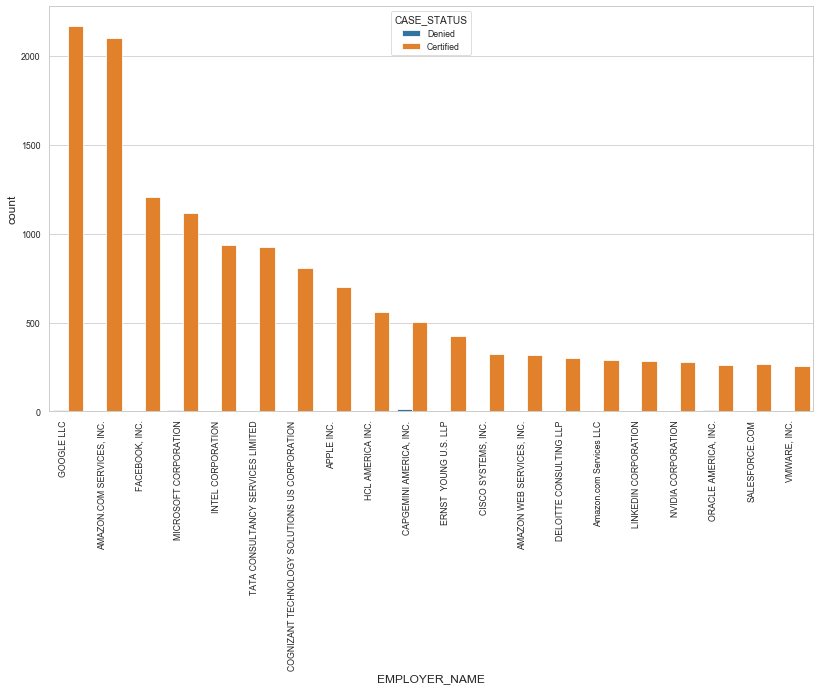

In [46]:
#Graph showing the proportion of Certified and Denied PERM applications for the top 10 companies by number of applicants

sns.set_style("whitegrid")
fig, ax = plt.pyplot.subplots()
fig.set_size_inches(13.7, 8.27)
sns.countplot(ax = ax, x='EMPLOYER_NAME', data = dataset_copy, hue='CASE_STATUS', \
              order=dataset_copy.EMPLOYER_NAME.value_counts().iloc[:20].index,alpha = 1)

fig.autofmt_xdate(rotation=90)



Majority of the FAANG companies have very small proportion of denied applications. Applying for the PERM through the above companies would ensure PERM elegebility in majority of the cases

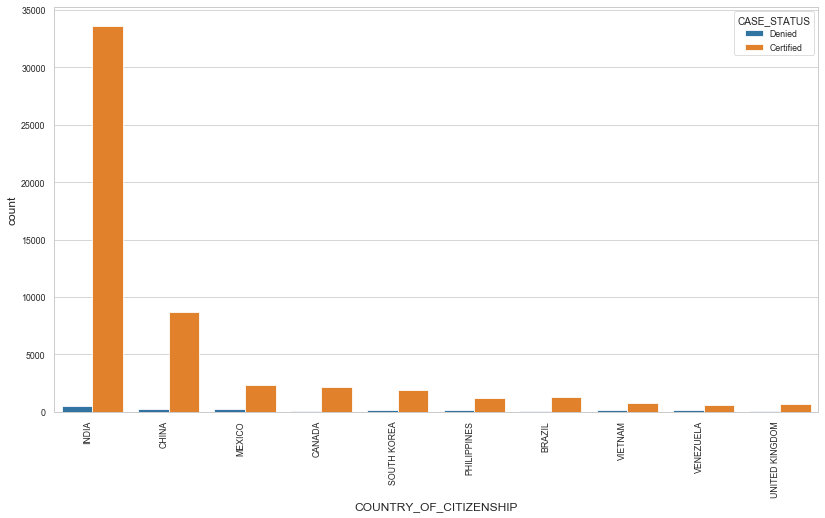

In [47]:
#Graph showing the proportion of Certified and Denied PERM applications for the top 10 countries by number of applicants

sns.set_style("whitegrid")
fig, ax = plt.pyplot.subplots()
fig.set_size_inches(13.7, 8.27)
sns.countplot(ax = ax, x='COUNTRY_OF_CITIZENSHIP', data = dataset_copy, hue='CASE_STATUS', \
              order=dataset_copy.COUNTRY_OF_CITIZENSHIP.value_counts().iloc[:10].index,alpha = 1)


fig.autofmt_xdate(rotation=90)

India, China, Mexico, Canda and South Korea have very high proportion of PERM approvals

In [48]:
dataset_copy['PW_SKILL_LEVEL'].unique()

array(['Level I', 'Level III', 'Level IV', 'Level II', nan], dtype=object)

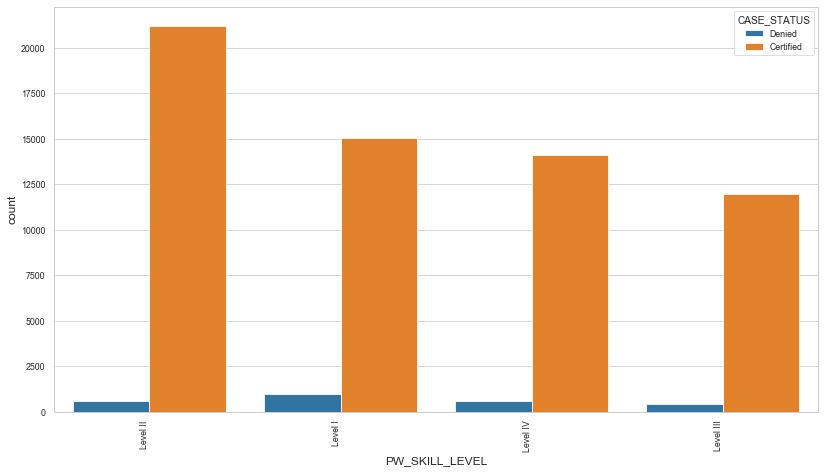

In [49]:
#Graph showing the proportion of Certified and Denied PERM applications for the applicants based on their skill levels.

sns.set_style("whitegrid")
fig, ax = plt.pyplot.subplots()
fig.set_size_inches(13.7, 8.27)
sns.countplot(ax = ax, x='PW_SKILL_LEVEL', data = dataset_copy, hue='CASE_STATUS', \
              order=dataset_copy.PW_SKILL_LEVEL.value_counts().iloc[:10].index,alpha = 1)


fig.autofmt_xdate(rotation=90)

In [50]:
# case status VS wage
wage_case_status = dataset_copy[['CASE_STATUS','PW_SKILL_LEVEL','PW_WAGE','PW_UNIT_OF_PAY']].groupby(['CASE_STATUS', 'PW_SKILL_LEVEL','PW_UNIT_OF_PAY']).mean().round(2)
wage_case_status

PW_WAGE
CASE_STATUS PW_SKILL_LEVEL PW_UNIT_OF_PAY           
Certified   Level I        Year             54735.69
            Level II       Year             90217.05
            Level III      Year            102689.86
            Level IV       Year            117545.88
Denied      Level I        Year             38572.71
            Level II       Year             71299.53
            Level III      Year             69917.51
            Level IV       Year             81395.80

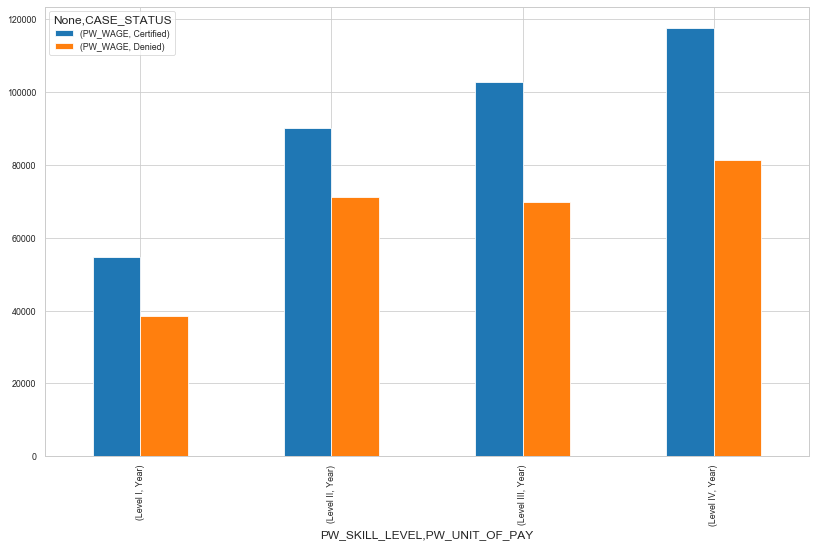

In [51]:
wage_case_status.unstack('CASE_STATUS').plot.bar(figsize=(13.7, 8.27))

In each wage level, the average wage of approved case is higher than that of denied case. The difference is much significant in Level IV.

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Job Title')]

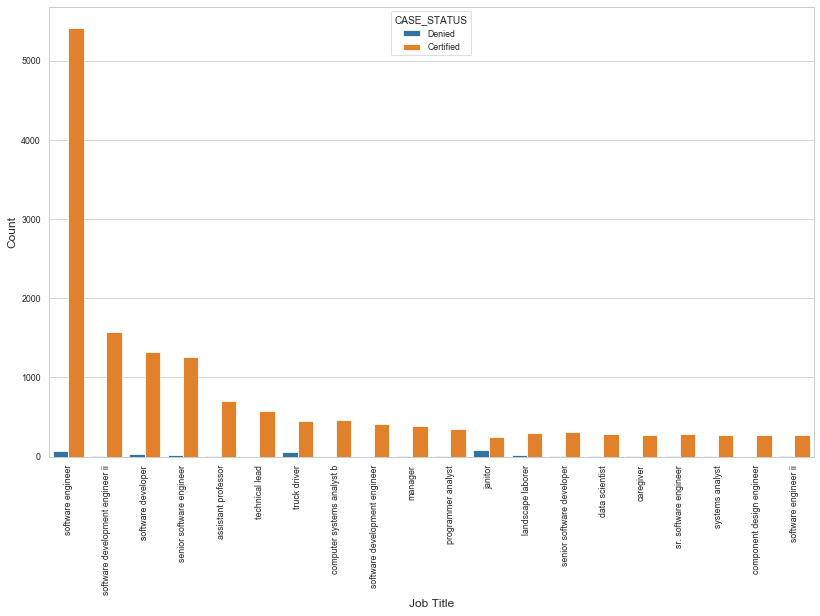

In [52]:
#Graph showing the proportion of Certified and Denied PERM applications for the applicants based on their positions.
fig, ax = plt.pyplot.subplots()
fig.set_size_inches(13.7, 8.27)
sns.countplot(ax = ax, x='JOB_TITLE',data=dataset_copy, hue='CASE_STATUS', order=dataset_copy.JOB_TITLE.value_counts().iloc[:20].index)   

plt.pyplot.xticks(rotation=90)
ax.set(xlabel='Job Title', ylabel='Count')

### Findings

1. Based on the above plots, we can infer that New York, Santa Clara, Mountain View and Chicago have acceptance rates compared to other cities
2.  California, Illinois and Massachusetts have high acceptance rates compared to the other states
3.  There's a huge demand for the IT related roles and the majority of the cases are approved for PERM
4.  Also, there's a huge wait time for the mid-level roles and the wait time for the CXO level employees is around 40 - 50 days on an average
5. So, for a higher chance of an PERM eligibility, employees working in IT industry has a fair chance of being approved

Additional Findings:  
1. "IH SERVICES.INC" has only a 20% chance for an visa application to be certified.
2. Around almost 60% of the applicants earn between 60 to 120 thousand dollars yearly.
3. Almost most applicants that are being certified have either a bachelors or a masters degree
4. Indians constitute to be more than half of the applicants who apply for the H1-B visa
5. The dominant way to get perm is through H1B

5. Software engineer is the most popular job title for PERM application. 

6. The wage level II has seen the most cases of applications, followed by wage level I, level IV and Level III. In each wage level, the average wage of approved case is higher than that of denied case. The difference is much significant in Level IV.